In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

all_stocks = []
for name in list(os.listdir('archive')):
    
    path = os.path.join('archive', name)
    single_stock = pd.read_csv(path).set_index('date')
    single_stock = single_stock.loc[:,['close']]       # 保留收盘价
    stock_name = name.split('.')[0]   # 拿到股票名称
    single_stock = single_stock.rename(columns={'close':stock_name})
    # print(single_stock)
    all_stocks.append(single_stock)
    # print(single_stock.isnull().any()) # 全部非空
    # print(stock_name)

all_stocks = pd.concat(all_stocks, axis=1)
print(all_stocks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15555 entries, 2009-07-01 to 1978-03-24
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BUD     3598 non-null   float64
 1   BA      15554 non-null  float64
 2   BRK     6906 non-null   float64
 3   MDT     12726 non-null  float64
 4   HSBC    6103 non-null   float64
 5   TM      10989 non-null  float64
 6   V       3923 non-null   float64
 7   MO      15554 non-null  float64
 8   NVS     6779 non-null   float64
 9   C       13566 non-null  float64
 10  T       10057 non-null  float64
 11  BAC     12775 non-null  float64
 12  SHEL    7291 non-null   float64
 13  BP      15554 non-null  float64
 14  SYK     10989 non-null  float64
 15  CB      7696 non-null   float64
 16  NOW     2842 non-null   float64
 17  LLY     12955 non-null  float64
 18  LOW     10989 non-null  float64
 19  SONY    12775 non-null  float64
 20  UL      10983 non-null  float64
 21  TJX     9149 non-null   f

In [3]:
all_stocks = all_stocks.dropna()        # 起始2019-05-10 结束2023-10-16
# length = stocks.shape[0]        # 总数据个数

print('total shape: ', all_stocks.shape)

unknown = all_stocks[-30:]
stocks = all_stocks[:-30]

print('known shape: ', stocks.shape)
print('unknown shape: ', unknown.shape)


total shape:  (1117, 100)
known shape:  (1087, 100)
unknown shape:  (30, 100)


In [4]:

# returns = np.log(unknown / unknown.shift(1))   # 收益
# print(returns)

In [5]:
# print ("年化收益")
# r_annual = returns.mean()*252
# print (r_annual)      # 一年252个交易日
# print (32*"-")
# print ("协方差")
# cov = returns.cov()*252
# print (cov)
# print (32*"-")
# print("方差")
# std = np.sqrt(returns.var()*252)
# print(std)
# print (32*"-")

In [6]:
# r_annual.sort_values()[-10:]

In [7]:
returns.hist(bins = 50, figsize = (15,15))  # 直方图是数据分布的表示形式。

NameError: name 'returns' is not defined

In [4]:
# 训练数据准备
from sklearn.model_selection import train_test_split

length = stocks.shape[0]        # 总数据个数

X = []
Y = []
for i in range(0, length - 30, 11):
    x = stocks[i:(i+30)].T.to_numpy()
    y = stocks[i+30:i+31].T.to_numpy()
    # print(x.shape)
    y = y.squeeze()
    # print(y.shape)
    X.append(x)
    Y.append(y)
    

X = np.concatenate(X)
Y = np.concatenate(Y)

print('total: ', X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=False)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7,shuffle=True)
print('X_train: ', X_train.shape)
# print('X_val: ', X_val.shape)
print('X_test: ', X_test.shape)


total:  (9700, 30)
X_train:  (7760, 30)
X_test:  (1940, 30)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from tqdm import tqdm
models = [
    ('RF', RandomForestRegressor(n_estimators=1000, n_jobs=-1)),
    # ('SVR', SVR(kernel='poly')),
    # ('SVR', SVR(kernel='linear')),    
    # ('SVR', SVR(kernel='rbf')),     # SVR: 0.849  evs: 0.77519
    ('DT', DecisionTreeRegressor())
]

# 遍历模型
for m in tqdm(models):
    # 训练模型
    m[1].fit(X_train, y_train)
    # 预测模型
    # val_pred = m[1].predict(X_val)
    test_pred = m[1].predict(X_test)

    # 输出hit-rate和交叉验证结果
    print("%s:\n%0.5f" % (m[0], m[1].score(X_test, y_test)))
    # print("val evs: %.5f" % explained_variance_score(val_pred, y_val))
    print("test evs: %.5f\n" % explained_variance_score(test_pred, y_test))

 50%|█████     | 1/2 [00:18<00:18, 18.51s/it]

RF:
0.99931
test evs: 0.99931



100%|██████████| 2/2 [00:18<00:00,  9.36s/it]

DT:
0.99868
test evs: 0.99869



## 开始进行计算

In [6]:
# print(unknown.info())

unknown_selected = unknown.loc[:,['LLY','PGR','CI','UNH']]    # 选的这四个股票中最后30天的   2023-09-05 到 2023-10-16
print(unknown_selected.shape)
all_selected = all_stocks.loc[:,['LLY','PGR','CI','UNH']]     # 选的这四个股票中总的1117天的
print(all_selected.shape)
print(all_selected[-5:])
print(unknown_selected[:5])

(30, 4)
(1117, 4)
               LLY     PGR      CI     UNH
date                                      
2023-10-10  579.31  142.25  291.76  524.24
2023-10-11  605.28  143.86  294.45  524.13
2023-10-12  610.50  143.30  295.80  525.54
2023-10-13  609.20  154.95  305.09  539.40
2023-10-16  616.64  157.05  312.13  538.03
               LLY     PGR      CI     UNH
date                                      
2023-09-05  558.19  133.52  278.75  480.81
2023-09-06  559.95  134.84  275.63  476.94
2023-09-07  573.23  137.41  281.29  484.81
2023-09-08  586.46  135.76  281.48  480.77
2023-09-11  595.56  137.26  284.82  479.38


In [7]:
# 后三十天数据GT
y_gt = {    # 后30天unknown的真实值
    'BUD_x' : [],   
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}

for i in range(len(unknown_selected)):
    x = unknown_selected[i:(i+1)].T.to_numpy()
    # print(x)
    for j,k in enumerate(y_gt):
        y_gt[k].append(x[j])
    # break

for j,k in enumerate(y_gt):
        y_gt[k] = np.concatenate(y_gt[k])
print(len(y_gt['BUD_x']))   # 一共有多少数据
print(y_gt['BUD_x'][-5:])

30
[579.31 605.28 610.5  609.2  616.64]


In [8]:
# 用前三十天的预测下一天的数据
sel_x = {       # 待预测日期前30天的真实值
    'BUD_x' : [],
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}


for i in range(len(all_selected)-60, len(all_selected)-30):
    x = all_selected[i:(i+30)].T.to_numpy()
    for j,k in enumerate(sel_x):
        sel_x[k].append(x[j])
    

for j,k in enumerate(sel_x):
        sel_x[k] = np.stack(sel_x[k])
# X_sel = np.concatenate(X_sel)
# y_sel = np.concatenate(y_sel)

print('total: ', len(sel_x['BUD_x']))
print(sel_x['BUD_x'][-5:])


total:  30
[[553.92 553.9  547.99 554.2  557.11 558.19 559.95 573.23 586.46 595.56
  599.3  598.88 591.61 575.66 571.28 574.96 569.64 550.13 550.54 552.29
  550.01 549.76 544.45 537.13 538.29 525.19 531.46 541.48 565.22 571.76]
 [553.9  547.99 554.2  557.11 558.19 559.95 573.23 586.46 595.56 599.3
  598.88 591.61 575.66 571.28 574.96 569.64 550.13 550.54 552.29 550.01
  549.76 544.45 537.13 538.29 525.19 531.46 541.48 565.22 571.76 579.31]
 [547.99 554.2  557.11 558.19 559.95 573.23 586.46 595.56 599.3  598.88
  591.61 575.66 571.28 574.96 569.64 550.13 550.54 552.29 550.01 549.76
  544.45 537.13 538.29 525.19 531.46 541.48 565.22 571.76 579.31 605.28]
 [554.2  557.11 558.19 559.95 573.23 586.46 595.56 599.3  598.88 591.61
  575.66 571.28 574.96 569.64 550.13 550.54 552.29 550.01 549.76 544.45
  537.13 538.29 525.19 531.46 541.48 565.22 571.76 579.31 605.28 610.5 ]
 [557.11 558.19 559.95 573.23 586.46 595.56 599.3  598.88 591.61 575.66
  571.28 574.96 569.64 550.13 550.54 552.29 550.01

In [9]:
RF_pred = {
    'BUD_x' : [],
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}

DT_pred = {
    'BUD_x' : [],
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}
# 遍历模型

for j in sel_x:
    # 预测模型
    RF_pred[j] = models[0][1].predict(sel_x[j]) # RF
    DT_pred[j] = models[1][1].predict(sel_x[j]) #DT
    print(j, "RF evs: %.5f\n" % explained_variance_score(RF_pred[j], y_gt[j]))
    print(j, "DT evs: %.5f\n" % explained_variance_score(DT_pred[j], y_gt[j]))


print('total: ', len(RF_pred['BUD_x']))
print(RF_pred['BUD_x'][-5:])


BUD_x RF evs: 0.74512

BUD_x DT evs: 0.60954

TM_x RF evs: 0.48855

TM_x DT evs: 0.54580

C_x RF evs: 0.64984

C_x DT evs: 0.44932

NOW_x RF evs: 0.90666

NOW_x DT evs: 0.87208

total:  30
[575.86688 574.84089 594.69174 603.22343 607.28468]


In [10]:
# 计算每日收益率（预测值与前一天真实值）
# np.concatenate((all_selected[-31:-30].T.to_numpy(), y_gt[stock][:-1]))
# print(all_selected[-31:-30].T.to_numpy())

shifted_y_gt = {    # 用来算收益的往后错一位的后30天unknown的真实值
    'BUD_x' : [],   
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}

RF_single_returns = {    # 每一个股票预测的收益率 random forests
    'BUD_x' : [],   
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}

DT_single_returns = {    # 每一个股票预测的收益率 decision tree
    'BUD_x' : [],   
    'TM_x' : [],
    'C_x' : [],
    'NOW_x' : []
}

for index, stock in enumerate(y_gt):
    shifted_y_gt[stock] = np.concatenate((all_selected[-31:-30].T.to_numpy()[index], y_gt[stock][:-1]))     # 将第一天前一天的弄进来
    RF_single_returns[stock] = np.log(RF_pred[stock] / shifted_y_gt[stock])
    DT_single_returns[stock] = np.log(DT_pred[stock] / shifted_y_gt[stock])

# print(shifted_y_gt['BUD_x'])
print(RF_single_returns['BUD_x'])  
# returns = np.log(stocks / stocks.shift(1))   # 收益

[-0.00848413 -0.00375915 -0.00655725  0.00014738 -0.01542513 -0.00450773
 -0.00745675 -0.00604619  0.00393894  0.00639898  0.01209988  0.00545895
  0.01311331  0.00783228 -0.00452442 -0.0060213  -0.00171571 -0.00261328
 -0.0019868  -0.00756093 -0.00799979 -0.00082789 -0.0077667   0.00116005
 -0.00685686  0.0071572  -0.00774445 -0.01764797 -0.01199063 -0.00314894]


In [11]:
# 用前1117-30天的数据算方差协方差
returns = np.log(all_selected[:-30] / all_selected[:-30].shift(1))   # 收益
print(returns.shape)

# print ("年化收益")
# r_annual = returns.mean()*252
# print (r_annual)      # 一年252个交易日
print (32*"-")
print ("协方差")
cov = returns.cov()
print (cov)
print (32*"-")
print("方差")
std = np.sqrt(returns.var())
print(std)
print (32*"-")

(1087, 4)
--------------------------------
协方差
          LLY       PGR        CI       UNH
LLY  0.000392  0.000127  0.000166  0.000172
PGR  0.000127  0.000326  0.000153  0.000145
CI   0.000166  0.000153  0.000482  0.000325
UNH  0.000172  0.000145  0.000325  0.000368
--------------------------------
方差
LLY    0.019793
PGR    0.018044
CI     0.021953
UNH    0.019191
dtype: float64
--------------------------------


In [12]:
from tqdm import tqdm, tgrange

def gen_weights(n):
    weights = np.random.rand(n)
    return weights / np.sum(weights)

def port_ret(w, r, day):
    ret = 0.
    for i, stock in enumerate(y_gt):
        ret += r[stock][day] * w[i]
    return ret

# print(port_ret(gen_weights(4), RF_single_returns, 6))

def port_std(w):
    return np.sqrt(np.dot(w.T, np.dot(returns.cov(), w)))

# print(port_std(gen_weights(4)))

def gen_ports(times, r, day):
    for _ in range(times):
        w = gen_weights(4)
        yield (port_std(w), port_ret(w, r, day), w)

# df = pd.DataFrame(gen_ports(5000, RF_single_returns, 1), columns=['std', 'ret', 'w'])
# print(df.head)

<AxesSubplot:xlabel='std', ylabel='ret'>

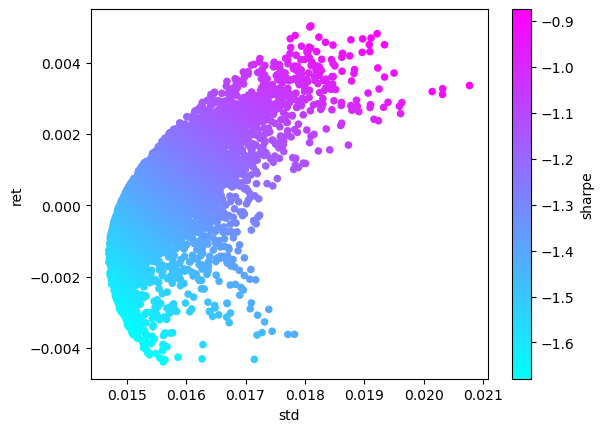

In [39]:
# # 不使用
# #无风险利率使用美国一年期国债：5.45
# df = pd.DataFrame(gen_ports(5000, RF_single_returns, 7), columns=['std', 'ret', 'w'])

# df['sharpe'] = (df['ret'] - 5.45/252) / df['std']
# df.plot.scatter('std', 'ret', c='sharpe', cmap='cool', sharex=False)

In [21]:
# 不使用
# df.loc[df.sharpe.idxmax()].ret  # 找最大sharpe 比率

In [13]:
RF_port_ret = []
DT_port_ret = []
real_return = np.log(all_selected / all_selected.shift(1))[-30:].to_numpy()    # 后30天的真实收益率(numpy格式) shape(30,4)


for day in tqdm(range(30), desc='RF', unit='day'):
    df = pd.DataFrame(gen_ports(5000, RF_single_returns, 1), columns=['std', 'ret', 'w'])
    df['sharpe'] = (df['ret'] - 5.45/2520) / df['std']
    best_weight = df.loc[df.sharpe.idxmax()].w
    RF_port_ret.append(np.sum(real_return[day] * best_weight))  # 当日真实值*预测值算的权重=真实组合收益

for day in tqdm(range(30), desc='DT', unit='day'):
    df = pd.DataFrame(gen_ports(5000, DT_single_returns, 1), columns=['std', 'ret', 'w'])
    df['sharpe'] = (df['ret'] - 5.45/252) / df['std']
    best_weight = df.loc[df.sharpe.idxmax()].w
    DT_port_ret.append(np.sum(real_return[day] * best_weight))  # 当日真实值*预测值算的权重=真实组合收益

print(RF_port_ret)   
print(len(DT_port_ret))

DT: 100%|██████████| 30/30 [00:26<00:00,  1.15day/s]

[-0.009206558585414724, 0.00910162369425393, 0.01851050577587289, -0.010996287000555063, 0.010678964700840033, 0.008671463573991104, 0.0029598951365505982, 0.0033305347763028584, -0.006124881971575941, 0.01082380571239197, 0.012043610935188114, 0.0026574032169041956, 0.0005637383729668293, 0.00652971307580503, -0.0034785631248950444, -0.011241064633192696, -0.0008657022035565071, 0.0003386260330682292, -0.008751886662616636, -0.0019404240359787326, 0.0011202652161652954, 0.017564751739143517, 0.004339564959193104, 0.006407417285451663, 0.0029748618950110237, -0.005172948220381217, 0.011676619938862612, -0.0027683987797962033, 0.06761841304400713, 0.01274228505323924]
30


In [14]:
def cal_cum_prof(ret):
    data = pd.DataFrame(ret, columns=['day_ret'])
    data['cum_profit'] = pd.DataFrame(1+data['day_ret']).cumprod()-1
    return data['cum_profit'][-1:].to_list()[0]    # 拿到最终的累计收益率

,day_ret,cum_profit
0,-0.011238,-0.011238
1,0.007362,-0.003959
2,0.018922,0.014888
3,-0.011001,0.003724
4,0.010721,0.014485
5,0.008712,0.023323
6,0.002726,0.026113
7,0.002696,0.028880
8,-0.005591,0.023127
9,0.011155,0.034540


In [15]:
# 使用nasdaq指数作为比较

# 读取计算nasdaq指数
nasdaq = pd.read_csv('nasdaq31.csv').set_index('Date')["Close"] # 这个东西是36个交易日
nasdaq = np.log(nasdaq / nasdaq.shift(1))[1:]
nasdaq = nasdaq.to_list()

nasdaq_cul_ret = cal_cum_prof(nasdaq)

RF_cul_ret = cal_cum_prof(RF_port_ret)
DT_cul_ret = cal_cum_prof(DT_port_ret)

print('nasdaq 收益率：', nasdaq_cul_ret)
print('RF 收益率：', RF_cul_ret)
print('DT 收益率：', DT_cul_ret)

nasdaq 收益率： -0.034484709805679414
RF 收益率： 0.15819677646862762
DT 收益率： 0.10728144189342825


# 画图

<AxesSubplot:title={'center':'LSTM'}, xlabel='Day', ylabel='return rate'>

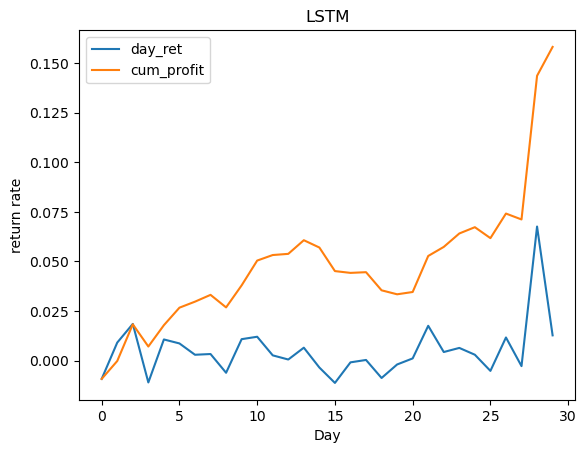

In [21]:
# 看累计收益率 Random Forest

fff = pd.DataFrame(RF_port_ret, columns=['day_ret'])
fff['cum_profit'] = pd.DataFrame(1+fff['day_ret']).cumprod()-1
fff.plot(title='LSTM', xlabel='Day', ylabel='return rate')

<AxesSubplot:title={'center':'Random Forest'}, xlabel='Day', ylabel='return rate'>

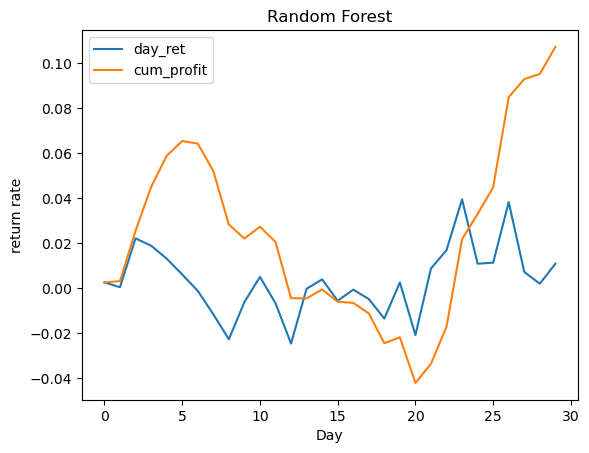

In [23]:
# 看累计收益率 Decision tree

ggg = pd.DataFrame(DT_port_ret, columns=['day_ret'])
ggg['cum_profit'] = pd.DataFrame(1+ggg['day_ret']).cumprod()-1
ggg.plot(title='Random Forest', xlabel='Day', ylabel='return rate')

<AxesSubplot:xlabel='Date', ylabel='return rate'>

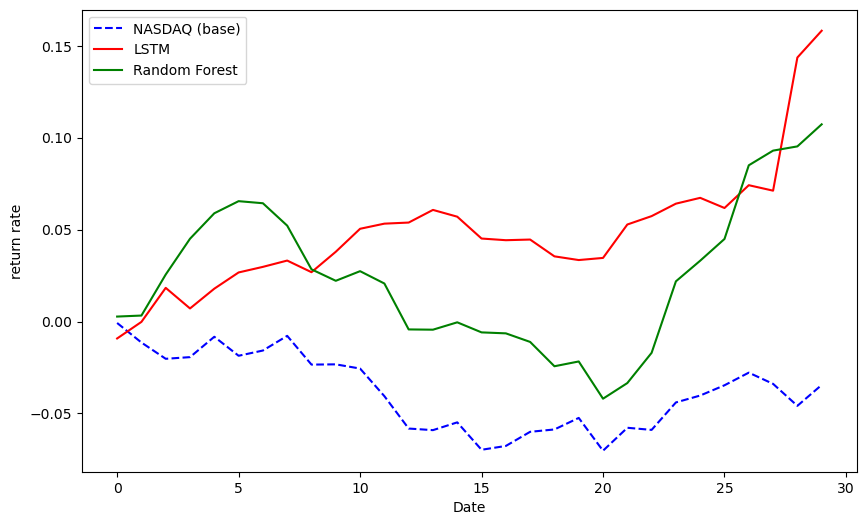

In [70]:
nar = pd.DataFrame(nasdaq, columns=['day_ret'])
nar['cum_profit'] = pd.DataFrame(1+nar['day_ret']).cumprod()-1
# ggg.plot(title='Random Forest', xlabel='Day', ylabel='return rate')

nar['cum_profit'].plot(color='b', figsize=(10, 6), legend=True, label='NASDAQ (base)', linestyle="dashed")
fff['cum_profit'].plot(color='r',legend=True, label='LSTM', xlabel='Date')
ggg['cum_profit'].plot(color='g', legend=True, label='Random Forest',ylabel='return rate')

<AxesSubplot:xlabel='Date'>

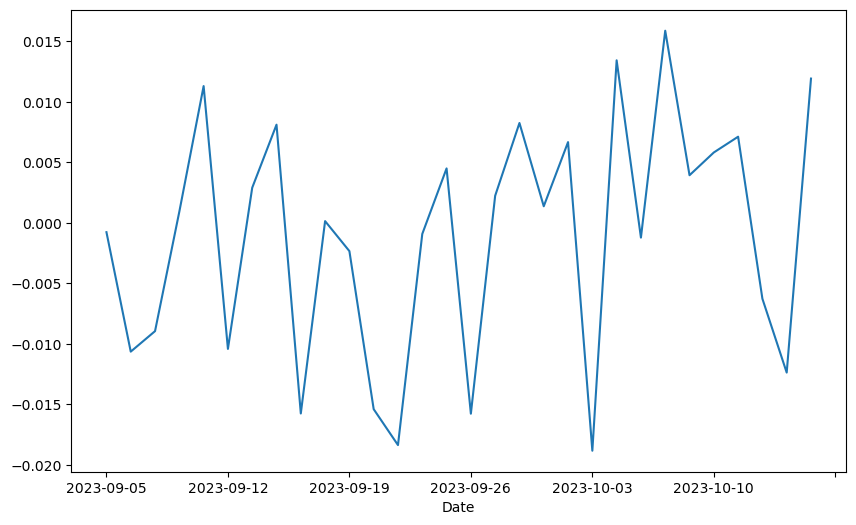

In [47]:
na.plot( figsize=(10, 6))